# **2D:**

In [13]:
# pip install kneed

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans

In [15]:
data = pd.read_csv('Mall_Customers.csv', usecols=['Annual Income (k$)', 'Spending Score (1-100)'])
data.head(5)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [16]:
data.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

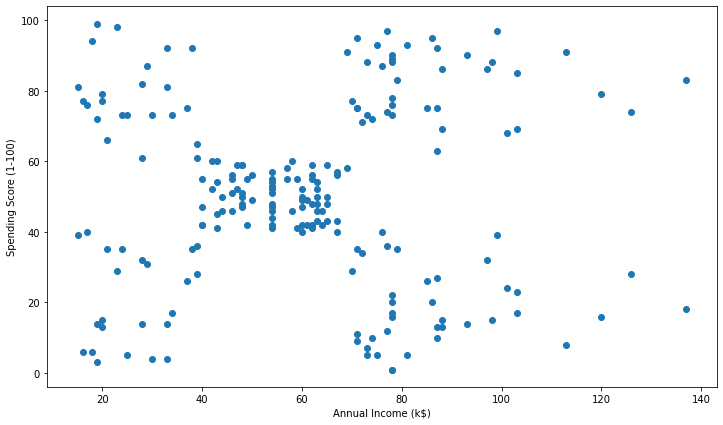

In [17]:
# ploting before clustering

plt.figure(figsize=(12,7))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [18]:
def Elbow_Method(data):
  wcss = []
  for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=43)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
  
  kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
  return kn.knee, wcss

In [19]:
def Ploting_Elbow_graph(x, y):
  plt.figure(figsize=(13,5))
  plt.plot(x, y)
  plt.title('The Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.show()

In [20]:
k_points, wcss = Elbow_Method(data)
k_points

5

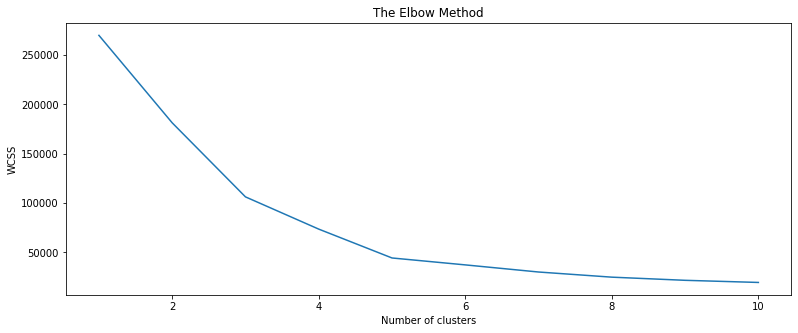

In [21]:
Ploting_Elbow_graph(x=range(1,11), y=wcss)

In [22]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [23]:
# find the data points whnich is belong the cluster 0:
data[y_kmeans==0].head()

,Annual Income (k$),Spending Score (1-100)
43,39,61
46,40,55
47,40,47
48,40,42
49,40,42


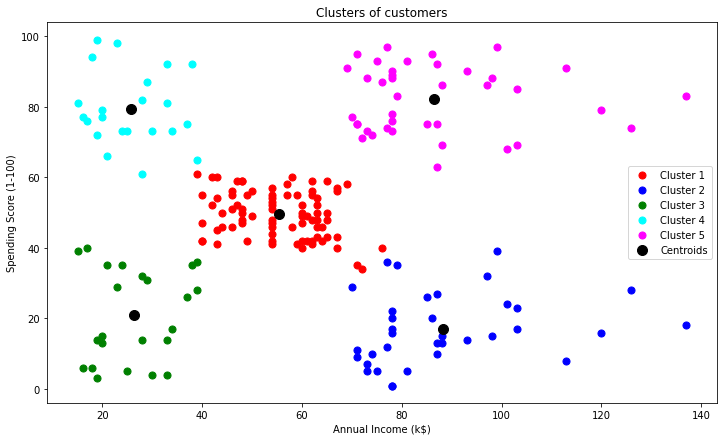

In [24]:
# Visualize the cluster:

plt.figure(figsize=(12,7))
plt.scatter(data[y_kmeans == 0]['Annual Income (k$)'], data[y_kmeans == 0]['Spending Score (1-100)'], s=50, c='red', label='Cluster 1')
plt.scatter(data[y_kmeans == 1]['Annual Income (k$)'], data[y_kmeans == 1]['Spending Score (1-100)'], s=50, c='blue', label ='Cluster 2')
plt.scatter(data[y_kmeans == 2]['Annual Income (k$)'], data[y_kmeans == 2]['Spending Score (1-100)'], s=50, c='green', label ='Cluster 3')
plt.scatter(data[y_kmeans == 3]['Annual Income (k$)'], data[y_kmeans == 3]['Spending Score (1-100)'], s=50, c='cyan', label ='Cluster 4')
plt.scatter(data[y_kmeans == 4]['Annual Income (k$)'], data[y_kmeans == 4]['Spending Score (1-100)'], s=50, c='magenta', label ='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')


plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [25]:
# New Datasets:

data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
data = data[['Glucose', 'BloodPressure']]

In [27]:
data.isnull().sum()

Glucose          0
BloodPressure    0
dtype: int64

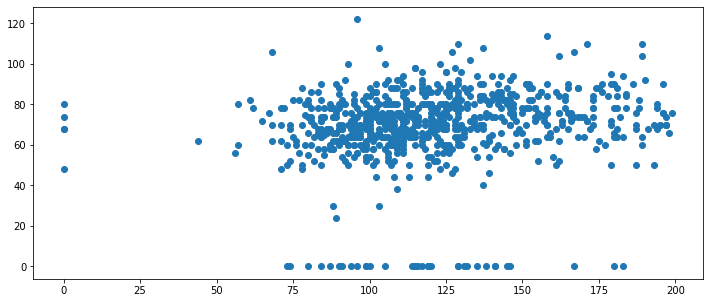

In [28]:
# ploting before clustering

plt.figure(figsize=(12,5))
plt.scatter(data['Glucose'], data['BloodPressure'])
plt.show()

In [29]:
k_points, wcss = Elbow_Method(data)
k_points

4

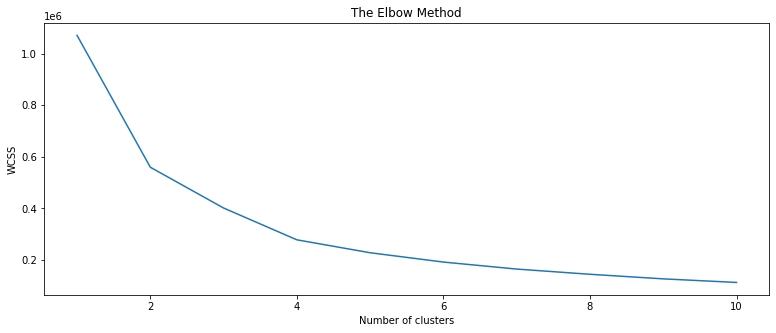

In [30]:
Ploting_Elbow_graph(x=range(1,11), y=wcss)

In [31]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)
print(y_kmeans)

[0 1 2 1 0 0 1 3 2 0 0 2 0 2 2 3 0 1 3 0 0 1 2 0 0 0 0 1 0 0 0 2 1 1 0 1 0
 1 1 0 2 0 0 2 2 2 0 1 1 3 1 1 1 2 2 1 2 1 0 1 3 0 1 0 0 1 0 0 1 0 1 0 0 0
 1 1 1 1 3 0 1 3 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 2 2 0 1 1 0 1 0 1 1 2
 2 1 1 2 0 0 1 1 1 2 0 1 0 0 1 0 0 0 1 2 0 2 1 1 0 1 1 0 1 0 1 1 1 2 1 1 1
 0 1 0 0 2 2 2 2 1 1 1 2 2 1 0 1 0 1 0 0 1 0 1 0 3 1 1 2 1 0 0 0 1 0 1 1 0
 2 2 0 0 0 1 0 2 3 1 2 1 1 1 0 0 0 1 1 1 0 2 2 1 2 1 0 2 0 0 2 1 0 1 0 2 2
 3 0 1 1 1 2 2 0 0 0 1 0 1 2 2 2 2 1 1 1 0 0 0 2 0 2 0 0 1 0 1 1 1 0 1 0 2
 2 2 3 1 0 0 1 3 0 1 3 1 1 0 1 1 1 1 1 0 1 0 0 0 2 0 0 2 0 1 1 1 1 0 0 2 2
 0 0 1 0 3 0 1 0 2 0 2 0 0 0 1 1 2 1 0 0 1 2 0 2 0 0 0 2 0 2 0 2 1 1 0 1 3
 1 1 2 3 0 2 2 0 1 1 0 1 0 0 3 1 1 1 0 1 1 1 2 0 3 1 2 2 2 0 0 0 1 0 1 1 0
 2 0 1 1 0 0 1 1 2 1 1 1 1 1 0 0 0 0 0 1 1 2 0 0 2 0 1 0 1 2 1 0 0 1 2 0 0
 1 2 2 1 0 0 0 0 2 1 0 1 0 0 1 1 0 2 2 3 2 0 1 3 1 1 0 1 3 0 0 1 0 2 1 0 1
 0 2 1 1 1 0 1 0 1 3 1 2 0 1 0 0 0 1 1 1 0 0 1 1 3 2 0 0 0 0 0 0 1 0 0 0 2
 0 1 1 3 0 0 2 1 2 1 1 1 

In [32]:
# find the data points whnich is belong the cluster 0:
data[y_kmeans==0].head()

,Glucose,BloodPressure
0,148,72
4,137,40
5,116,74
9,125,96
10,110,92


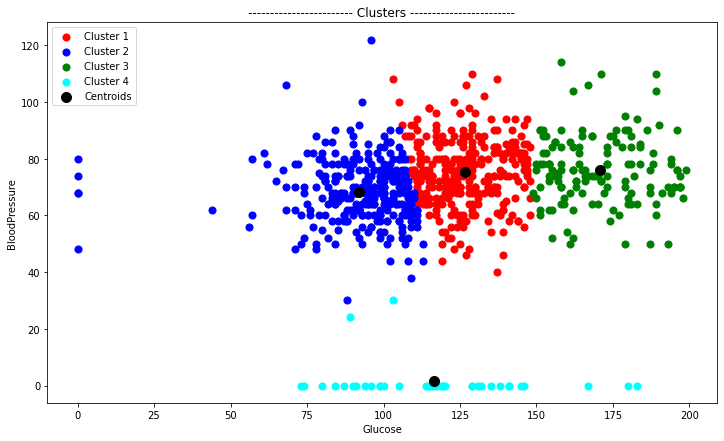

In [33]:
# Visualize the cluster:

plt.figure(figsize=(12,7))
plt.scatter(data[y_kmeans == 0]['Glucose'], data[y_kmeans == 0]['BloodPressure'], s=50, c='red', label='Cluster 1')
plt.scatter(data[y_kmeans == 1]['Glucose'], data[y_kmeans == 1]['BloodPressure'], s=50, c='blue', label ='Cluster 2')
plt.scatter(data[y_kmeans == 2]['Glucose'], data[y_kmeans == 2]['BloodPressure'], s=50, c='green', label ='Cluster 3')
plt.scatter(data[y_kmeans == 3]['Glucose'], data[y_kmeans == 3]['BloodPressure'], s=50, c='cyan', label ='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')


plt.title('------------------------ Clusters ------------------------')
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.legend()
plt.show()

No handles with labels found to put in legend.


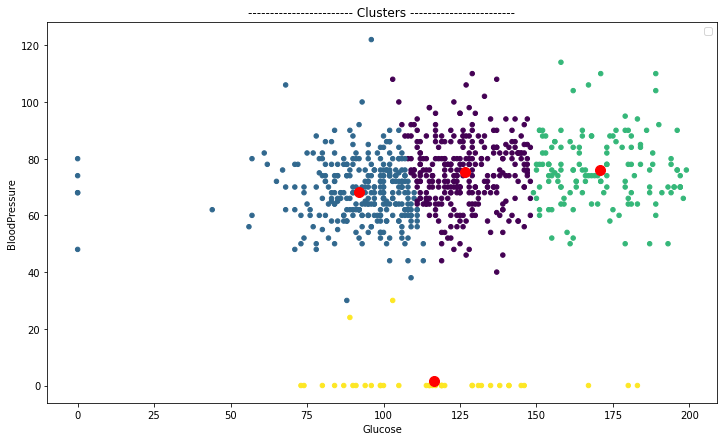

In [34]:
plt.figure(figsize=(12,7))
plt.scatter(data['Glucose'], data['BloodPressure'], c=y_kmeans, s=20)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100);
plt.title('------------------------ Clusters ------------------------')
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.legend()
plt.show()

In [35]:
# Assigning the cluster labels:----

data['Cluster_Lable'] = y_kmeans

In [36]:
data.head(20)

,Glucose,BloodPressure,Cluster_Lable
0,148,72,0
1,85,66,1
2,183,64,2
3,89,66,1
4,137,40,0
5,116,74,0
6,78,50,1
7,115,0,3
8,197,70,2
9,125,96,0


In [51]:
# filter the data for one cluster:

def Filter_Cluster_Data(data):
  for i in data['Cluster_Lable'].unique():
    cluster_data = data[data['Cluster_Lable'] == i]
    # cluster_data = cluster_data.drop('Cluster_Lable', 1)
    print(cluster_data.head(3))
  

In [52]:
Filter_Cluster_Data(data)

   Glucose  BloodPressure  Cluster_Lable
0      148             72              0
4      137             40              0
5      116             74              0
   Glucose  BloodPressure  Cluster_Lable
1       85             66              1
3       89             66              1
6       78             50              1
    Glucose  BloodPressure  Cluster_Lable
2       183             64              2
8       197             70              2
11      168             74              2
    Glucose  BloodPressure  Cluster_Lable
7       115              0              3
15      100              0              3
18      103             30              3
